<img align="right" src="https://github.com/eo2cube/eo2cube_book/blob/7880672deff906b41f993c856fe1a7eb38ed5b3a/images/banner_siegel.png?raw=true" style="width:1000px;">

# Data Lookup and Loading

## Background

A "datacube" is a digital information architecture specializing in hosting and cataloguing spatial information. Eo2cube is based on the [Open Data Cube](https://www.opendatacube.org/) infrastructure and specializes in storing remotely sensed data, particularly from Earth Observation satellites such as Landsat and Sentinel-2. The eo2cube contains multiple Analysis Ready Data "products". These data products are often composed of a range of "measurements", such as the suite of remote sensing band values. This notebook will focus on several straightforward ways to inspect the product, measure a datacube, run data queries, and load the data using a wide range of options, including resampling and interpolation.

## Description

This notebook demonstrates how to **browse the available products/measurements** stored within and how to **load data** from the eo2cube datacube by using the `dc.load()` function. Topics covered include:

* How to connect to the datacube
* How to list all the products/measurements
* How to load data with the `dc.load()`function
* How to customisie the `dc.load()`query
* Tips and tricks to simplify the data loading process

***

## Load packages

The `datacube` package is required to query the eo2cube datacube database and load the requested data. The pandas package is required to format tables. The `with_ui_cbk` function from `odc.ui` enables a progress bar when loading large amounts of data.

In [65]:
import datacube
import pandas as pd
from odc.ui import with_ui_cbk

# Set some configurations for displaying tables nicely
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', None)

## Datacube connection

After importing the datacube package, you are ready to connect to the eo2cube datacube. Users need to specify a name for their session, known as the app name. The users generate this name to track down issues with database queries. It does not have any effect on the analysis. Use a short name that is consistent with the purpose of your notebook. For example, 03_Products_and_measurements is used as the app name in this notebook.
The resulting dc object provides access to all the data within the eo2cube datacube.

In [66]:
dc = datacube.Datacube(app = '03_Products_and_measurement') #datacube connection

## List products

Once a datacube instance has been created, users can explore the products and measurements stored within.
The following cell lists all products that are currently available in the eo2cube datacube by using the dc.list_products() function.

In [67]:
dc.list_products()

,name,description,license,default_crs,default_resolution
name,,,,,
cop_dem_glo_30,cop_dem_glo_30,Copernicus DEM 30 m,None,None,None
landsat_etm_c2_l2,landsat_etm_c2_l2,Landsat Level 2 Collection 2 data acquired by the Enhanced Thematic Mapper onboard Landsat 7,CC-BY-4.0,None,None
landsat_ot_c2_l2,landsat_ot_c2_l2,Landsat Level 2 Collection 2 data acquired by the Operational Land Imager and Thermal Infrared Sensor onboard Landsat 8 and 9,CC-BY-4.0,None,None
meteo_demmin,meteo_demmin,Meteorological parameters for the Agrisens Project,None,None,None
s2_c1_l2a,s2_c1_l2a,The Sentinel-2 program provides global imagery in thirteen spectral bands at 10m-60m resolution and a revisit time of approximately five days. This dataset represents the global Sentinel-2 archive...,None,None,None
s2_l2a,s2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance) and converted to Cloud Optimized GeoTIFFs",None,None,None
s2_vi,s2_vi,Vegetation indices derived from Sentinel-2A/B,None,None,None
s2_vi_v2,s2_vi_v2,Vegetation indices derived from Sentinel-2A/B,None,None,None
sentinel1_coherence,sentinel1_coherence,Sentinel-1A/B SAR Coherence,None,None,None


## List measurements

Every product is associated with a range of available measurements. For the most time, these are the individual satellite bands.

The dc.list_measurements() function can be used to interrogate the measurements associated with a given product (specified by the name column from the table above). For example, `s2_indices` refers to indices derived from Sentinel-2 data.

In [68]:
product = 's2_c1_l2a'
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
coastal,coastal,uint16,1,0.0,NaN,NaN
blue,blue,uint16,1,0.0,NaN,NaN
green,green,uint16,1,0.0,NaN,NaN
red,red,uint16,1,0.0,NaN,NaN
rededge1,rededge1,uint16,1,0.0,NaN,NaN
rededge2,rededge2,uint16,1,0.0,NaN,NaN
rededge3,rededge3,uint16,1,0.0,NaN,NaN
nir,nir,uint16,1,0.0,NaN,NaN
nir08,nir08,uint16,1,0.0,NaN,NaN


## Display Map
Before loading the data, it is a good idea to first check out the area of interest in a map. We can use display_map function for that.

**Don't forget to import function `display_map` from `DEAPlotting` when you load the libraries.**

In [1]:
from dea_tools.plotting import display_map

display_map([9.88, 10.0],[49.75, 49.82], crs = 'EPSG:4326')

## Loading data with the `dc.load()`function


The function requires the following minimum arguments:

* `product`: The data product to load (to see all available eo2cube products, use `dc.list_products()`) 
* `x`: The spatial region in the x dimension. By default, the x and y arguments accept queries in a geographical coordinate system WGS84, identified by the EPSG code 4326.
* `y`: The spatial region in the y dimension. The dimensions longitude/latitude and x/y can be used interchangeably. It is also possible to use the extent of an imported shapefile as x/y 
* `time`: The temporal extent. The time dimension can be specified using a tuple of datetime objects or strings in the “YYYY”, “YYYY-MM” or “YYYY-MM-DD” format.
* `output_crs`: Reproject the data from the default or stored CRS into a specified CRS.
* `resolution`: Defines the output resolution.

The used product is defined by its name. The spatial extent is defined by lat/lon coordinates. The time intervall ist defined by the format "YYYY-MM-DD". The argument `progess_cbk` with the imported `with_ui_cbk()`function enables loading bar.

In [47]:
data = dc.load(product= "s2_c1_l2a",
               x= (9.88 ,10.0),
               y= (49.75, 49.82),
               time= ("2022-03-01", "2022-03-15"),
               output_crs = "EPSG:32734",
               resolution = (-10, 10),
               progress_cbk=with_ui_cbk())


In [38]:
data

<xarray.Dataset>
Dimensions:      (time: 6, y: 905, x: 977)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T10:24:31.024000 ... 2022-01...
  * y            (y) float64 1.558e+07 1.558e+07 ... 1.557e+07 1.557e+07
  * x            (x) float64 -3.002e+05 -3.002e+05 ... -2.905e+05 -2.904e+05
    spatial_ref  int32 32734
Data variables: (12/15)
    coastal      (time, y, x) uint16 5310 5310 5310 5310 ... 389 389 389 389
    blue         (time, y, x) uint16 5216 5252 5136 4872 ... 471 333 364 404
    green        (time, y, x) uint16 5080 5080 5072 4800 ... 455 419 492 467
    red          (time, y, x) uint16 5172 5088 5088 4868 ... 545 480 452 484
    rededge1     (time, y, x) uint16 5592 5592 5368 5368 ... 707 732 732 789
    rededge2     (time, y, x) uint16 5383 5383 5320 5320 ... 977 968 968 1124
    ...           ...
    nir09        (time, y, x) uint16 8317 8317 8317 8317 ... 1399 1399 1399 1399
    swir16       (time, y, x) uint16 4965 4965 4861 4861 ... 781 817 817 1063
    swir22       (time, y, x) uint16 5132 5132 5011 5011 ... 446 562 562 707
    scl          (time, y, x) uint8 9 9 9 9 9 9 9 9 9 9 ... 3 3 3 3 3 3 3 3 3 3
    aot          (time, y, x) uint16 122 122 122 122 122 122 ... 75 75 75 75 75
    wvp          (time, y, x) uint16 1240 1240 1240 1240 ... 1028 1028 1028 1028
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

## Customization of the `dc.load()` function

The query created above only used the basic arguments of the `dc.load()` function. However, it is possible to customize your loading query by using multiple other arguments. A detailed description of every useable argument can be found in the [original documentation of the `dc.load()` function](https://datacube-core.readthedocs.io/en/datacube-1.2.2/dev/generate/datacube.Datacube.load.html) of the Opendatacube initiative. In this notebook we will present the most used arguments that allow easy and effective querying of eo2cube products.

### Specifying Measurements
<a id='first_query'></a>
The `measurements` argument provides the option to filter the desired product by its bands. This argument takes a list of the names of the desired measurement, as listed in the `dc.list_measurements()` function. If not provided, all stored measurements of the product will be loaded.

In the following code only the `blue`, `green` and `red` bands of the specified product are added to the query. The resulting dataset will only include the defined measurements.

In [40]:
data = dc.load(product= "s2_c1_l2a",
               x= (9.88 ,10.0),
               y= (49.75, 49.82),
               time= ("2022-03-01", "2022-03-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:4326",
               resolution = (10,10),
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 6, latitude: 1, longitude: 1)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T10:24:31.024000 ... 2022-01...
  * latitude     (latitude) float64 45.0
  * longitude    (longitude) float64 5.0
    spatial_ref  int32 4326
Data variables:
    blue         (time, latitude, longitude) uint16 0 0 0 0 0 0
    green        (time, latitude, longitude) uint16 0 0 0 0 0 0
    red          (time, latitude, longitude) uint16 0 0 0 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

### Specifying CRS and Reprojecting 

To reproject the data from the default or stored CRS into a specified CRS, it is neccessary to define the `output_crs` and a new `resolution` for your data. The unit of the new `output_crs` and `resolution`must identical.

In [52]:
data = dc.load(product= "s2_c1_l2a",
               x= (9.88 ,10.0),
               y= (49.75, 49.82),
               time= ("2022-03-01", "2022-03-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:4326",
               resolution = (-0.0002734477121776, 0.0002734477121776),
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 6, latitude: 257, longitude: 439)
Coordinates:
  * time         (time) datetime64[ns] 2022-03-02T10:19:41.024000 ... 2022-03...
  * latitude     (latitude) float64 49.82 49.82 49.82 ... 49.75 49.75 49.75
  * longitude    (longitude) float64 9.88 9.88 9.881 9.881 ... 9.999 10.0 10.0
    spatial_ref  int32 4326
Data variables:
    blue         (time, latitude, longitude) uint16 9528 9584 9600 ... 6672 6704
    green        (time, latitude, longitude) uint16 8928 8872 8904 ... 6644 6680
    red          (time, latitude, longitude) uint16 8488 8496 8560 ... 6752 6772
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

### Selecting and plotting a single timestep

To acess all the "red" bands, we can use `.` notation. `.isel()` stands for “index selection”, which selects individual timesteps from a dataset based on the sequence of loaded timesteps. Counting in Python begins at 0. Here, we specify `.isel(time=0)`. After selecting a band and a timestep, the `.plot()` method can be used to display the chosen data:

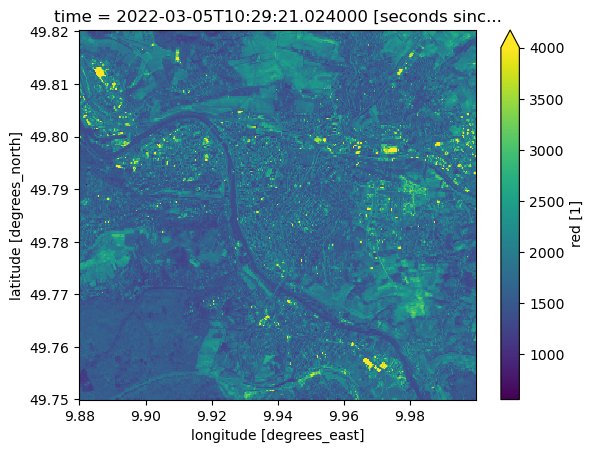

In [55]:
data.red.isel(time=1).plot(vmax=4000)

### Spatial resampling

To resample the data to another resolution, multiple options of resampling methods are available. You can define the `resampling` argument with one of the following methods:
`"nearest", "cubic", "bilinear", "cubic_spline", "lanczos", "average", "mode", "gauss", "max", "min", "med", "q1", "q3"`.

By default, the `dc.load()` function is uses "nearest neighbour" resampling, allocating each new pixel with the value of the closest input pixel. However, this may not be the most appropriate choice for some data (e.g., continuous data).

The example code below resamples the specified product to a resolution of (-20, 20) meters using the bilinear interpolation method (`bilinear`). Note that the absolute pixel numbers of resampled data are halved as the dataset is resampled to twice the original resolution.

In [58]:
data_10 = dc.load(product= "s2_c1_l2a",
               x= (9.88 ,10.0),
               y= (49.75, 49.82),
               time= ("2022-03-01", "2022-03-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32734",
               resolution = (-10,10),
               progress_cbk=with_ui_cbk())
    
data_20 = dc.load(product= "s2_c1_l2a",
               x= (9.88 ,10.0),
               y= (49.75, 49.82),
               time= ("2022-03-01", "2022-03-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32734",
               resolution = (-20,20),
               resampling = "bilinear",
               progress_cbk=with_ui_cbk())

print(data_10.dims)
print(data_20.dims)

Frozen({'time': 6, 'y': 905, 'x': 977})
Frozen({'time': 6, 'y': 453, 'x': 489})


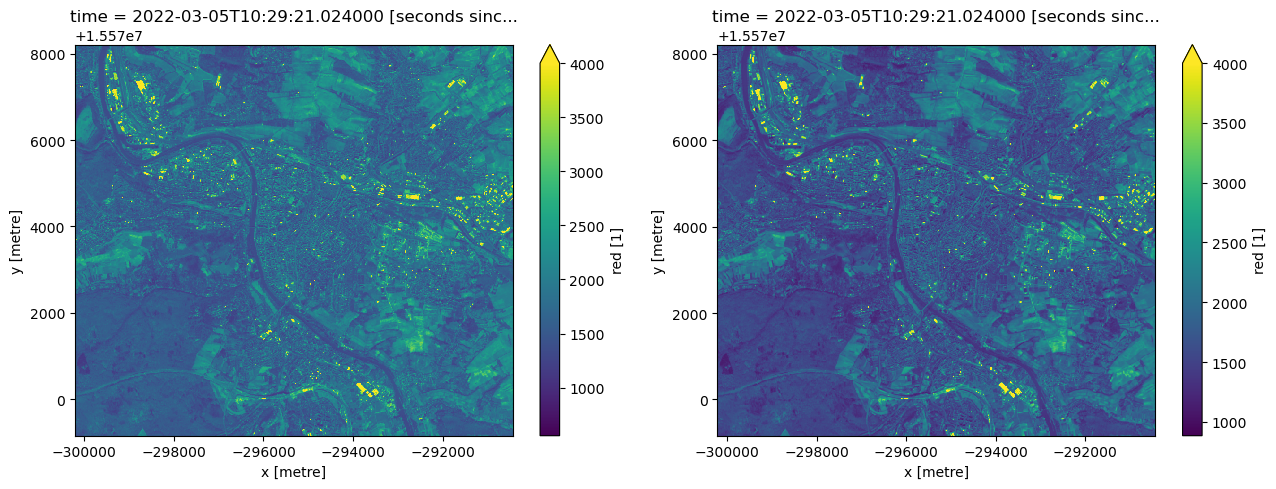

In [60]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(13,5))


data_10.red.isel(time=1).plot(ax=axes[0], vmax=4000)
data_20.red.isel(time=1).plot(ax=axes[1], vmax=4000)
plt.tight_layout()
plt.show()

It is also possible to request different resampling methods for various bands. This is particularly useful when a dataset stores both continuous and categorical data. 

For example, the Sentinel-2 dataset has a scene classification layer (`scl`) which contains categorical values about the quality of a single pixel. Suppose you want to resample your continuous data to another resolution with the `bilinear` method and include the categorical `scl` band. 
It is best to use an interpolation method that does not modify the data directly by resampling the categorical `scl` band.
This can be done using Python Dictionaries as value for the `resampling` argument. The following code resamples continuous bands with `bilinear` interpolation and uses the `nearest` (which does not modify the data values) for the categorical `scl` band.

In [61]:
data_10 = dc.load(product= "s2_c1_l2a",
               x= (9.88 ,10.0),
               y= (49.75, 49.82),
               time= ("2022-03-01", "2022-03-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32734",
               resolution = (-20, 20),
               resampling = {"*": "bilinear", "scl": "nearest"},
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 6, y: 453, x: 489)
Coordinates:
  * time         (time) datetime64[ns] 2022-03-02T10:19:41.024000 ... 2022-03...
  * y            (y) float64 1.558e+07 1.558e+07 ... 1.557e+07 1.557e+07
  * x            (x) float64 -3.002e+05 -3.002e+05 ... -2.905e+05 -2.904e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) uint16 9701 9589 9528 9482 ... 6602 6645 6634 6634
    green        (time, y, x) uint16 9037 8937 8934 8821 ... 6575 6606 6620 6584
    red          (time, y, x) uint16 8623 8497 8425 8423 ... 6704 6686 6649 6677
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

### Group by argument

Satellite datasets can have multiple observations per day with slightly different time stamps as the satellite collects data along its path. We can combine these observations by reducing the time dimension to the day level using `group_by = "solar_day"`.

A group_by argument helps combine multiple scenes of one date if the extent is visible in two sequential satellite scenes. By default, the scenes are simply copied together (e.g., the NA values of the first scene are filled with the values of the second scene). With the argument `"fuse_func,"` the user can control the mosaicing (e.g., specify an interpolation method).

This example loads data for the first week in April 2020. Since the extent of the AOI is too big to be covered by just one Sentinel 2 scene, multiple scenes (from contiguous paths) are available for each date. Using the `group_by = "solar_day"` argument, the `dc.load()` function automatically mosaics all scenes of a single date together. In this example, we defined no special interpolation method.

In [62]:
data_10 = dc.load(product= "s2_c1_l2a",
               x= (9.88 ,10.0),
               y= (49.75, 49.82),
               time= ("2022-03-01", "2022-03-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32734",
               resolution = (-20, 20),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 6, y: 453, x: 489)
Coordinates:
  * time         (time) datetime64[ns] 2022-03-02T10:19:41.024000 ... 2022-03...
  * y            (y) float64 1.558e+07 1.558e+07 ... 1.557e+07 1.557e+07
  * x            (x) float64 -3.002e+05 -3.002e+05 ... -2.905e+05 -2.904e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) uint16 9701 9589 9528 9482 ... 6602 6645 6634 6634
    green        (time, y, x) uint16 9037 8937 8934 8821 ... 6575 6606 6620 6584
    red          (time, y, x) uint16 8623 8497 8425 8423 ... 6704 6686 6649 6677
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

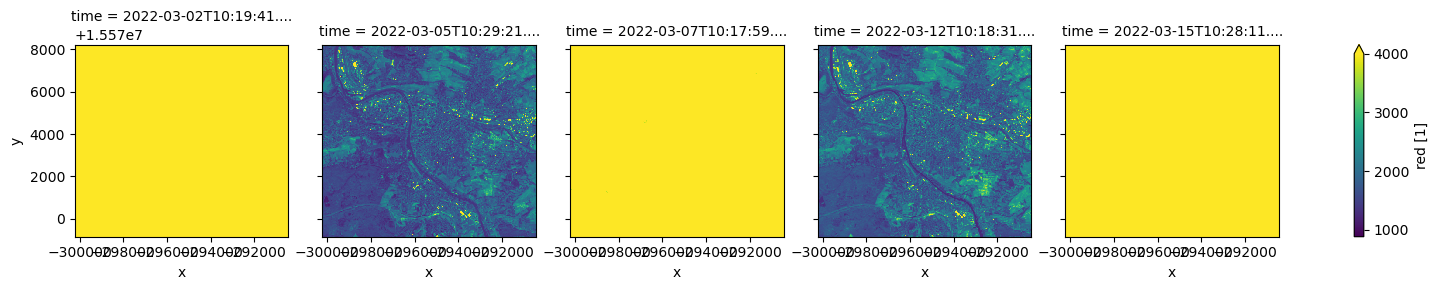

In [64]:
data.red.isel(time=[0,1,2,4,5]).plot(col="time", vmax=4000)

***

## Additional information

<font size="2">This notebook for the usage in the Open Data Cube entities of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is adapted from [Geoscience Australia](https://github.com/GeoscienceAustralia/dea-notebooks), published using the Apache License, Version 2.0. Thanks! </font>

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** December 2023